You are to build upon the predictive analysis (classification) that you already completed in the previous mini-project, adding additional modeling from new classification algorithms as well as more explanations that are inline with the CRISP-DM framework. You should use appropriate cross validation for all of your analysis (explain your chosen method of performance validation in detail). Try to use as much testing data as possible in a realistic manner (you should define what you think is realistic and why).
This report is worth 20% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a single document. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in the rendered iPython notebook. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.
### Dataset Selection
Select a dataset identically to the way you selected for the first project work week and mini-project. You are not required to use the same dataset that you used in the past, but you are encouraged. You must identify two tasks from the dataset to regress or classify. That is:
• two classification tasks OR
• two regression tasks OR
• one classification task and one regression task
For example, if your dataset was from the diabetes data you might try to predict two tasks: (1) classifying if a patient will be readmitted within a 30 day period or not, and (2) regressing what the total number of days a patient will spend in the hospital, given their history and specifics of the encounter like tests administered and previous admittance.
### Grading Rubric
• Data Preparation (15 points total)
• [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
 
• [5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).
• Modeling and Evaluation (70 points total)
• [10 points] Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
• [10 points] Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate.
• [20 points] Create three different classification/regression models (e.g., random forest, KNN, and SVM). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric.
• [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
• [10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods.
• [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.
• Deployment (5 points total)
• [5 points] How useful is your model for interested parties (i.e., the companies or
organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
• Exceptional Work (10 points total)
• You have free reign to provide additional modeling.
• One idea: grid search parameters in a parallelized fashion and visualize the
performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

Two dataframes for each classification task

Data cleanup (Dylan and Satvik)
Broad phase of flight dataframe

Injury (Injury)  for KNN (Nnenna)
- Look into ROC Curves
- Look at Sklearn parameters for KNN


Injury (Injury) for Decision Trees (Jobin)
- Look at Sklearn parameters for decision trees

Injury (Injury) for KNN

Injury (Injury) for Decision Trees



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Read in the Aviation Data
final_data = pd.read_csv("../Data/final_data.csv",low_memory=False,dtype={'damage': str})
#Delete columns that were imported incorrectly
del final_data["Unnamed: 0"]
del final_data["dprt_state.1"]
del final_data["index"]
del final_data["ntsb_no_x"]
#del final_data['ev_id']

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115706 entries, 0 to 115705
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ev_id              115706 non-null  object 
 1   acft_make          115643 non-null  object 
 2   acft_model         115630 non-null  object 
 3   cert_max_gr_wt     98673 non-null   float64
 4   acft_category      115287 non-null  object 
 5   damage             113877 non-null  object 
 6   far_part           114925 non-null  object 
 7   afm_hrs_last_insp  60298 non-null   float64
 8   type_fly           108599 non-null  object 
 9   dprt_city          111864 non-null  object 
 10  dprt_state         108791 non-null  object 
 11  rwy_len            64222 non-null   float64
 12  rwy_width          63110 non-null   float64
 13  ev_type            115706 non-null  object 
 14  ev_city            115646 non-null  object 
 15  ev_state           109635 non-null  object 
 16  ev

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
final_data.head(10)

,ev_id,acft_make,acft_model,cert_max_gr_wt,acft_category,damage,far_part,afm_hrs_last_insp,type_fly,dprt_city,dprt_state,rwy_len,rwy_width,ev_type,ev_city,ev_state,ev_country,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,sky_cond_ceil,sky_cond_nonceil,wind_vel_ind,wx_int_precip,phase_flt_spec
0,20001204X00000,Cessna,207,3800.0,AIR,SUBS,135,75.0,UNK,BETHEL,AK,NaN,NaN,ACC,QUINHAGAK,AK,USA,MINR,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1.0,BKN,UNK,UNK,UNK,Approach
1,20001204X00001,Boeing,747-100,750000.0,AIR,MINR,121,113.0,UNK,CHITOSE,JA,11800.0,150.0,INC,FAIRBANKS,AK,USA,NONE,0.0,0.0,0.0,NaN,NaN,4.0,NaN,NaN,NONE,SCAT,CALM,UNK,Landing
2,20001204X00002,Piper,PA-31-350,7369.0,AIR,SUBS,135,32.0,UNK,CHENEGA BAY,AK,NaN,NaN,ACC,ANCHORAGE,AK,USA,NONE,0.0,0.0,0.0,NaN,NaN,6.0,NaN,NaN,OVC,SCAT,UNK,UNK,Unknown
3,20001204X00003,Cessna,172,2300.0,AIR,SUBS,091,40.0,PERS,,,6398.0,150.0,ACC,BETHEL,AK,USA,NONE,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,BKN,UNK,UNK,LGT,Unknown
4,20001204X00004,Cessna,207,3800.0,AIR,SUBS,135,49.0,UNK,,AK,2610.0,40.0,ACC,CHEVAK,AK,USA,NONE,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,BKN,UNK,UNK,UNK,Descent
5,20001204X00005,Piper,PA-22-160,1840.0,AIR,SUBS,091,NaN,PERS,,,2200.0,70.0,ACC,ANCHORAGE,AK,USA,NONE,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,UNK,BKNT,CALM,UNK,Takeoff
6,20001204X00006,Beech,300,14100.0,AIR,DEST,091,3.0,EXEC,GREENEVILLE,SC,5500.0,100.0,ACC,CULLMAN,AL,USA,FATL,0.0,0.0,0.0,2.0,NaN,NaN,NaN,2.0,BKN,UNK,UNK,MOD,Approach
7,20001204X00007,Piper,PA-28-181,2550.0,AIR,DEST,091,NaN,PERS,ANDREWS,NC,NaN,NaN,ACC,BREVARD,NC,USA,FATL,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,NONE,CLER,CALM,UNK,Maneuvering
8,20001204X00008,Aero Commander,560A,6000.0,AIR,DEST,091,13.0,PERS,,,3800.0,36.0,ACC,BELLEVIEW,FL,USA,FATL,0.0,0.0,0.0,2.0,NaN,NaN,2.0,4.0,NONE,CLER,UNK,UNK,Approach
9,20001204X00009,Piper,PA-24-250,2900.0,AIR,SUBS,091,40.0,PERS,ALLAIRE,NJ,NaN,NaN,ACC,COLBERT,GA,USA,NONE,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,OVC,UNK,UNK,LGT,Unknown


In [5]:
#replace the all empty values to Nan to fix dprt_city column
final_data= final_data.replace(r'^\s+$', np.nan, regex=True)

In [6]:
finaldamagecount = final_data["dprt_city"].value_counts().reset_index()
finaldamagecount

,index,dprt_city
0,Anchorage,393
1,ANCHORAGE,380
2,Houston,226
3,Phoenix,199
4,Fairbanks,196
...,...,...
16399,W. KINGSTON,1
16400,St. Peterburg,1
16401,Sumner,1
16402,WRIGHTSTORM,1


In [7]:
final_data['acft_make'] = final_data['acft_make'].str.upper()
final_data['acft_category'] = final_data['acft_category'].str.upper()
final_data['damage'] = final_data['damage'].str.upper()
final_data['type_fly'] = final_data['type_fly'].str.upper()
final_data['dprt_city'] = final_data['dprt_city'].str.upper()
final_data['dprt_state'] = final_data['dprt_state'].str.upper()
final_data['ev_city'] = final_data['ev_city'].str.upper()
final_data['ev_type'] = final_data['ev_type'].str.upper()
final_data['ev_city'] = final_data['ev_city'].str.upper()
final_data['ev_country'] = final_data['ev_country'].str.upper()
final_data['sky_cond_ceil'] = final_data['sky_cond_ceil'].str.upper()
final_data['sky_cond_nonceil'] = final_data['sky_cond_nonceil'].str.upper()
final_data['wind_vel_ind'] = final_data['wind_vel_ind'].str.upper()
final_data['wx_int_precip'] = final_data['wx_int_precip'].str.upper()
final_data['phase_flt_spec'] = final_data['phase_flt_spec'].str.upper()
final_data['ev_highest_injury'] = final_data['ev_highest_injury'].str.upper()

In [8]:
final_data.loc[final_data['damage'].str.contains('UNK', na=False), 'damage'] = 'UNK'

In [9]:
final_data.dropna(subset=['cert_max_gr_wt','afm_hrs_last_insp',
                          'rwy_len','rwy_width'],inplace=True)

In [10]:
final_data = final_data.reset_index(drop=True)

In [11]:
#rename the injuries columns to make them easier to read
final_data = final_data.rename(columns={"inj_tot_f": "Total_Fatal_Injuries", 
                                        "inj_tot_s":"Total_Serious_Injuries",
                                        "inj_tot_m":"Total_Minor_Injuries",
                                        "inj_tot_n":'Total_Uninjured',
                                        "inj_tot_t":"Total_Injuries_Flight"})

#fill in 0s when there wasn't an injury in that category
final_data.update(final_data[['Total_Fatal_Injuries','Total_Serious_Injuries',
                              'Total_Minor_Injuries','Total_Uninjured',
                              'Total_Injuries_Flight','inj_f_grnd',
                              'inj_m_grnd','inj_s_grnd']].fillna(0))
final_data.head()

,ev_id,acft_make,acft_model,cert_max_gr_wt,acft_category,damage,far_part,afm_hrs_last_insp,type_fly,dprt_city,dprt_state,rwy_len,rwy_width,ev_type,ev_city,ev_state,ev_country,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,Total_Fatal_Injuries,Total_Minor_Injuries,Total_Uninjured,Total_Serious_Injuries,Total_Injuries_Flight,sky_cond_ceil,sky_cond_nonceil,wind_vel_ind,wx_int_precip,phase_flt_spec
0,20001204X00001,BOEING,747-100,750000.0,AIR,MINR,121,113.0,UNK,CHITOSE,JA,11800.0,150.0,INC,FAIRBANKS,AK,USA,NONE,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,NONE,SCAT,CALM,UNK,LANDING
1,20001204X00003,CESSNA,172,2300.0,AIR,SUBS,091,40.0,PERS,NaN,NaN,6398.0,150.0,ACC,BETHEL,AK,USA,NONE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BKN,UNK,UNK,LGT,UNKNOWN
2,20001204X00004,CESSNA,207,3800.0,AIR,SUBS,135,49.0,UNK,NaN,AK,2610.0,40.0,ACC,CHEVAK,AK,USA,NONE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BKN,UNK,UNK,UNK,DESCENT
3,20001204X00006,BEECH,300,14100.0,AIR,DEST,091,3.0,EXEC,GREENEVILLE,SC,5500.0,100.0,ACC,CULLMAN,AL,USA,FATL,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,BKN,UNK,UNK,MOD,APPROACH
4,20001204X00008,AERO COMMANDER,560A,6000.0,AIR,DEST,091,13.0,PERS,NaN,NaN,3800.0,36.0,ACC,BELLEVIEW,FL,USA,FATL,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0,NONE,CLER,UNK,UNK,APPROACH


In [12]:
final_data.update(final_data.fillna("UNK"))

In [13]:
#we want to account for ALL injuries. This includes injuries on the ground as well as passangers
#Here we will make a new column that shows total injuries including ground ones
final_data['Total_Injuries_Ground'] = final_data['inj_f_grnd']+final_data['inj_m_grnd']+final_data['inj_s_grnd']
final_data['Total_Injuries'] = final_data['Total_Injuries_Ground']+final_data['Total_Injuries_Flight']
final_data.head()

,ev_id,acft_make,acft_model,cert_max_gr_wt,acft_category,damage,far_part,afm_hrs_last_insp,type_fly,dprt_city,dprt_state,rwy_len,rwy_width,ev_type,ev_city,ev_state,ev_country,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,Total_Fatal_Injuries,Total_Minor_Injuries,Total_Uninjured,Total_Serious_Injuries,Total_Injuries_Flight,sky_cond_ceil,sky_cond_nonceil,wind_vel_ind,wx_int_precip,phase_flt_spec,Total_Injuries_Ground,Total_Injuries
0,20001204X00001,BOEING,747-100,750000.0,AIR,MINR,121,113.0,UNK,CHITOSE,JA,11800.0,150.0,INC,FAIRBANKS,AK,USA,NONE,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,NONE,SCAT,CALM,UNK,LANDING,0.0,0.0
1,20001204X00003,CESSNA,172,2300.0,AIR,SUBS,091,40.0,PERS,UNK,UNK,6398.0,150.0,ACC,BETHEL,AK,USA,NONE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BKN,UNK,UNK,LGT,UNKNOWN,0.0,0.0
2,20001204X00004,CESSNA,207,3800.0,AIR,SUBS,135,49.0,UNK,UNK,AK,2610.0,40.0,ACC,CHEVAK,AK,USA,NONE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BKN,UNK,UNK,UNK,DESCENT,0.0,0.0
3,20001204X00006,BEECH,300,14100.0,AIR,DEST,091,3.0,EXEC,GREENEVILLE,SC,5500.0,100.0,ACC,CULLMAN,AL,USA,FATL,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,BKN,UNK,UNK,MOD,APPROACH,0.0,2.0
4,20001204X00008,AERO COMMANDER,560A,6000.0,AIR,DEST,091,13.0,PERS,UNK,UNK,3800.0,36.0,ACC,BELLEVIEW,FL,USA,FATL,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0,NONE,CLER,UNK,UNK,APPROACH,0.0,4.0


In [14]:
final_data['Injury'] = np.where(final_data['Total_Injuries'] >0,1,0)
injuries = final_data["Injury"].value_counts().reset_index()
injuries.head(3)

,index,Injury
0,1,18750
1,0,16677


In [15]:
final_df = final_data.copy()
#Since we added up all of our injuries we don't need the other columns that include injury count since it will be colinear to our prediction variable
final_df = final_df.drop(['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries',
                          'Total_Uninjured','Total_Injuries_Flight','inj_f_grnd','inj_m_grnd',
                          'inj_s_grnd','Total_Injuries_Ground',"Total_Injuries","ev_highest_injury",
                          "ev_id","dprt_city"],axis = 1)
final_df = final_df.reset_index(drop=True)

## Final Dataframe for predicting total injury

In [16]:
df = final_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35427 entries, 0 to 35426
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   acft_make          35427 non-null  object 
 1   acft_model         35427 non-null  object 
 2   cert_max_gr_wt     35427 non-null  float64
 3   acft_category      35427 non-null  object 
 4   damage             35427 non-null  object 
 5   far_part           35427 non-null  object 
 6   afm_hrs_last_insp  35427 non-null  float64
 7   type_fly           35427 non-null  object 
 8   dprt_state         35427 non-null  object 
 9   rwy_len            35427 non-null  float64
 10  rwy_width          35427 non-null  float64
 11  ev_type            35427 non-null  object 
 12  ev_city            35427 non-null  object 
 13  ev_state           35427 non-null  object 
 14  ev_country         35427 non-null  object 
 15  sky_cond_ceil      35427 non-null  object 
 16  sky_cond_nonceil   354

In [17]:
X = final_df.drop("Injury", axis = 1).copy()
y = final_df["Injury"].copy()

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_features = ['cert_max_gr_wt',"afm_hrs_last_insp","rwy_width",'rwy_len']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler(with_mean=False))])

categorical_features = ['acft_make', 'acft_model', 'acft_category',
                        'damage', 'type_fly', 'dprt_state','ev_type',
                        'ev_state', 'sky_cond_ceil', 'sky_cond_nonceil',
                        'wind_vel_ind', 'wx_int_precip', 'phase_flt_spec',
                        'ev_city','ev_country','far_part']


categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop="first"))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

the_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [19]:
X = the_pipeline.fit_transform(X)
X

<35427x18473 sparse matrix of type '<class 'numpy.float64'>'
	with 619381 stored elements in Compressed Sparse Row format>

In [20]:
LE = LabelEncoder()
LE.fit(y)
y = LE.transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit 
cv = StratifiedShuffleSplit(n_splits=10,test_size=0.10, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import time
lr_clf = LogisticRegression(class_weight="balanced",solver='liblinear', penalty="l2",max_iter=100,random_state=42)
iter_num=0
for train_indices, test_indices in cv.split(X,y): 
#     start = time.time()
#     elapsed_time = (time.time() - start)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    lr_clf.fit(X_train,y_train)  # train object

    y_hat = lr_clf.predict(X_test) # get test set predictions
    print("====Iteration",iter_num," ====")
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print('accuracy:', acc )
    print(conf )
#     print('CV Time: ', elapsed_time)
    iter_num+=1

====Iteration 0  ====
accuracy: 0.8314987298899238
[[1490  178]
 [ 419 1456]]
====Iteration 1  ====
accuracy: 0.8179508890770534
[[1487  181]
 [ 464 1411]]
====Iteration 2  ====
accuracy: 0.8204911092294666
[[1482  186]
 [ 450 1425]]
====Iteration 3  ====
accuracy: 0.8196443691786621
[[1496  172]
 [ 467 1408]]
====Iteration 4  ====
accuracy: 0.8264182895850973
[[1494  174]
 [ 441 1434]]
====Iteration 5  ====
accuracy: 0.8120237087214225
[[1482  186]
 [ 480 1395]]
====Iteration 6  ====
accuracy: 0.8159751622918431
[[1477  191]
 [ 461 1414]]
====Iteration 7  ====
accuracy: 0.8204911092294666
[[1481  187]
 [ 449 1426]]
====Iteration 8  ====
accuracy: 0.8221845893310754
[[1492  176]
 [ 454 1421]]
====Iteration 9  ====
accuracy: 0.8283940163703076
[[1512  156]
 [ 452 1423]]


# KNN classifier

The KNN algorithm assumes that similar things exist in proximity. It can be used as a classifier to implement the k-nearest neighbors. KNN is used to make predictions. For our dataset, we will be using KNN to predict injury. Our datatest was scaled since KNN classifier requires that. We will be using stratified k-fold cross-validation because with this the mean response value is approximately equal in all the folds. Each test fold has equal class labels. For the KNN classifier, our evaluation metrics will be the accuracy, precision, AUC.

## Accuracy
This will be used to predict which model performs better at prediction. This will be an important metric in predicting an injury. 
$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

## Precision
Precision is the ratio between the True Positives and all the Positives. For our classification, it would be a measure of accidents that could lead to an injury.
$Precision = \frac{TP}{PP}$


## Area under the Curve
AUC will measure the performance of our classification problem at different thresholds. The AUC model will be used to evaluate which model is accurate. The closer the model to 1, the more it is a good model to distinguish between negative and positive scores.


In [30]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

yhat = np.zeros(y.shape) # we will fill this with predictions

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN accuracy', total_accuracy)
total_precision = mt.precision_score(y, yhat)
print ('KNN precision', total_precision)
total_confusion_matrix = mt.confusion_matrix(y, yhat)
print ('KNN confusion_matrix', total_confusion_matrix)

KNN accuracy 0.7161204730854998
KNN precision 0.7713679215833177
KNN confusion_matrix [[13015  3662]
 [ 6395 12355]]
CPU times: user 26.1 s, sys: 10.6 s, total: 36.7 s
Wall time: 39.3 s


We had an accuracy of about 71.6%. We will try k=5 to improve accuracy

In [34]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np
from sklearn import metrics as mt

yhat = np.zeros(y.shape) # we will fill this with predictions

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=5)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN accuracy', total_accuracy)
total_precision = mt.precision_score(y, yhat)
print ('KNN precision', total_precision)
total_confusion_matrix = mt.confusion_matrix(y, yhat)
print ('KNN confusion_matrix', total_confusion_matrix)


KNN accuracy 0.7248708612075535
KNN precision 0.7952384075555847
KNN confusion_matrix [[13555  3122]
 [ 6625 12125]]
CPU times: user 30.1 s, sys: 10.5 s, total: 40.6 s
Wall time: 43 s


We had an accuracy of 72% for k=5

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (9).

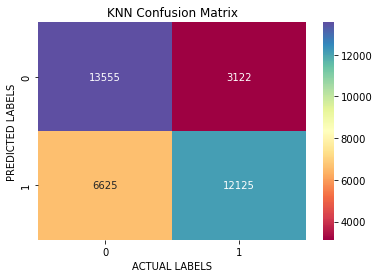

In [42]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(total_confusion_matrix, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
ax.set_title('KNN Confusion Matrix'); 
ax.xaxis.set_ticklabels(['11', '12','13','21','22','23','31','32','33']); ax.yaxis.set_ticklabels(['Soft', 'Tough']);

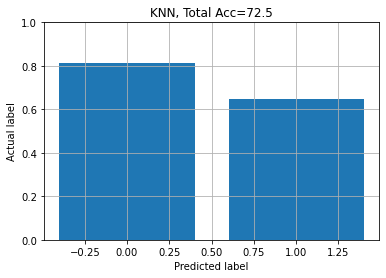

In [35]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhat,title="KNN")

## ROC Curve

We will plot the ROC curve which is a plot of True Positive Rate vs False Positive Rate. The AUC-ROC will help us visualize how well our KNN classifier is performing. For our dataset, We save the outputs into a dictionary of fpr and tpr (false positive and true positive rates). The keys to the dictionary are the class value

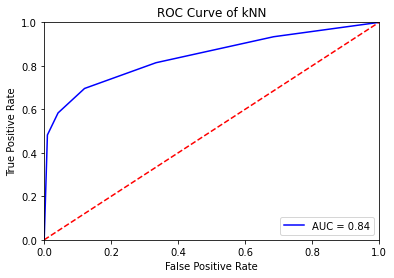

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [49]:
print(roc_auc)

0.8424901678657075


We had an AUC score of 84% which shows that it did a good job distinguishing between the positive and negative scores

In [50]:
#Perform hyperparameter search to find the best k value
param_grid = {'n_neighbors':np.arange(1,21)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [51]:
knn_cv.best_score_

0.7438527038865734

In [52]:
knn_cv.best_params_

{'n_neighbors': 20}

Thus a knn classifier with number of neighbors as 20 achieves the best score/accuracy of 0.7438 i.e about 74%

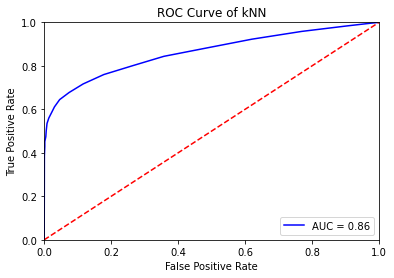

In [53]:
#We will try the roc curve with new k value
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

We had a better AUC score of 86% with k=20